#  Analisis exploratorio de datos de Telco

Retención en telefonía móvil
Contenido del Archivo de datos: Contiene 7043 filas (clientes) y 21 columnas (características). La columna **Churn** es nuestro variable target. Cada fila representa un cliente, cada columna contiene los atributos del cliente descritos en la columna Metadatos.

El conjunto de datos incluye información sobre: Clientes que se fueron en el último mes. Columna Churn (Renuncia) Servicios a los que se ha suscrito cada cliente: phone, multiple lines, internet, online security, online backup, device protection, tech support, and streaming TV and movies. Información de la cuenta del cliente: cuánto tiempo ha sido cliente, contrato, método de pago, facturación electrónica, cargos mensuales y cargos totales. Información demográfica sobre los clientes: sexo, rango de edad y si tienen socios y dependientes Fuente

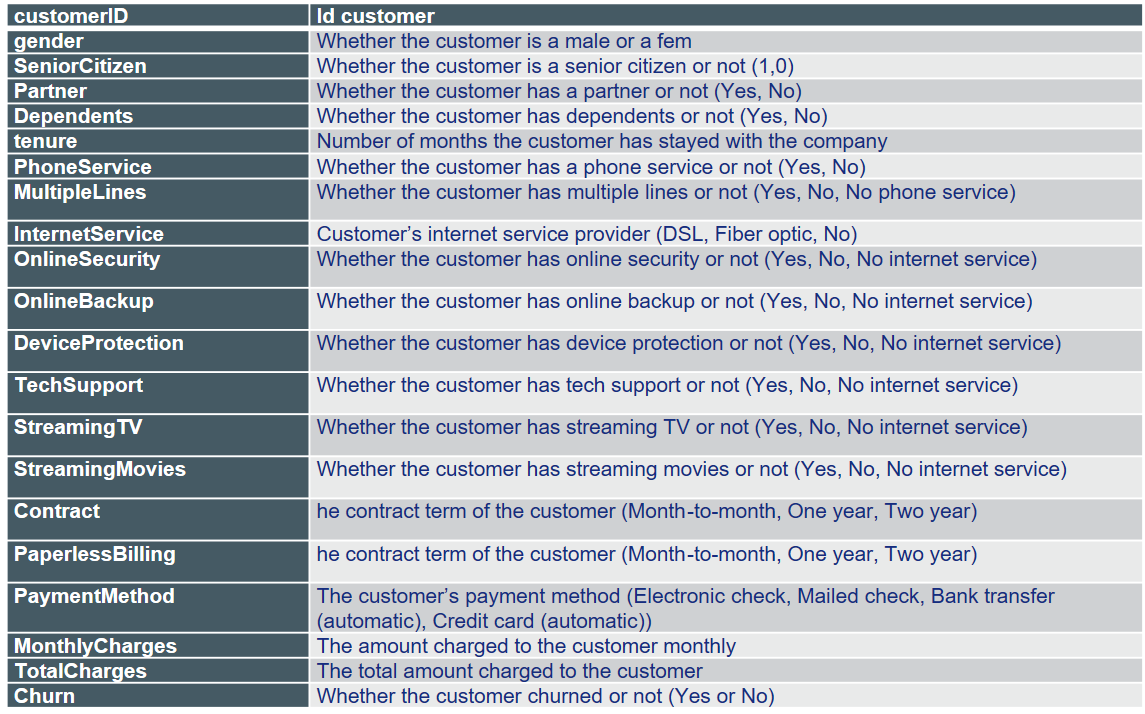

## 1.) Inicializacion de componentes

Importaremos las bibliotecas que usaremos. Y instancearemos el dataset

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sbn
import missingno as msno

DATASET_NAME = "telco_churn.train.csv"
dataframe = pd.read_csv(DATASET_NAME, encoding='latin-1', sep=';', decimal=",")

## 2.) Visualizacion de las columnas del dataframe original y algunos valores

Aca podremos ver que **MonthlyCharges** no es un **float64** por lo cual lo tendremos en cuenta en la fase de limpieza

In [2]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7044 entries, 0 to 7043
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   float64
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   float64
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  control           7043 non-null   object 
 11  OnlineBackup      7044 non-null   object 
 12  DeviceProtection  7043 non-null   object 
 13  TechSupport       7043 non-null   object 
 14  StreamingTV       7043 non-null   object 
 15  StreamingMovies   7043 non-null   object 
 16  Contract          7042 non-null   object 


A continuacion podemos ver algunos valores de los extremos del dataset

In [3]:
dataframe.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,Columna1
0,7644-OMVMY,Male,0.0,Yes,Yes,0.0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,Two year,No,Mailed check,"19,85",NaN,No,NaN
1,1371-DWPAZ,Female,0.0,Yes,Yes,0.0,No,No phone service,DSL,Yes,...,Yes,Yes,No,Two year,No,Credit card (automatic),"56,05",NaN,No,NaN
2,2520-SGTTA,Female,0.0,Yes,Yes,0.0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,Two year,No,Mailed check,"20,00",NaN,No,NaN
3,4367-NUYAO,Male,0.0,Yes,Yes,0.0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,Two year,No,Mailed check,"25,75",NaN,No,NaN
4,2923-ARZLG,Male,0.0,Yes,Yes,0.0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,One year,Yes,Mailed check,"19,70",NaN,No,NaN


In [4]:
dataframe.tail()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,Columna1
7039,8879-XUAHX,Male,0.0,Yes,No,71.0,Yes,Yes,Fiber optic,Yes,...,Yes,Yes,Yes,Two year,Yes,Electronic check,"116,25",8564.75,No,NaN
7040,9788-HNGUT,Male,0.0,Yes,No,72.0,Yes,Yes,Fiber optic,Yes,...,Yes,Yes,Yes,Two year,Yes,Credit card (automatic),"116,95",8594.40,No,NaN
7041,9739-JLPQJ,Female,0.0,Yes,Yes,72.0,Yes,Yes,Fiber optic,Yes,...,Yes,Yes,Yes,Two year,No,Credit card (automatic),"117,50",8670.10,No,NaN
7042,7569-NMZYQ,Female,0.0,Yes,Yes,72.0,Yes,Yes,Fiber optic,Yes,...,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),"118,75",8672.45,No,NaN
7043,2889-FPWRM,Male,0.0,Yes,No,72.0,Yes,Yes,Fiber optic,Yes,...,Yes,Yes,Yes,One year,Yes,Bank transfer (automatic),"117,80",8684.80,Yes,NaN


## 3.) Limpieza de datos (Buscando datos faltantes, nulos o no validos y hacer limpieza)

Usaremos la libreria **missingno** para revisar si hay datos nulos. Aca podemos ver que tenemos una columna llamada **Columna1** que no tiene nada y es inutil asi que la eliminaremos. Ademas **customerID** tampoco lo necesitamos. Otras cosas que haremos es limpiar **MonthlyCharges** y **tenure**

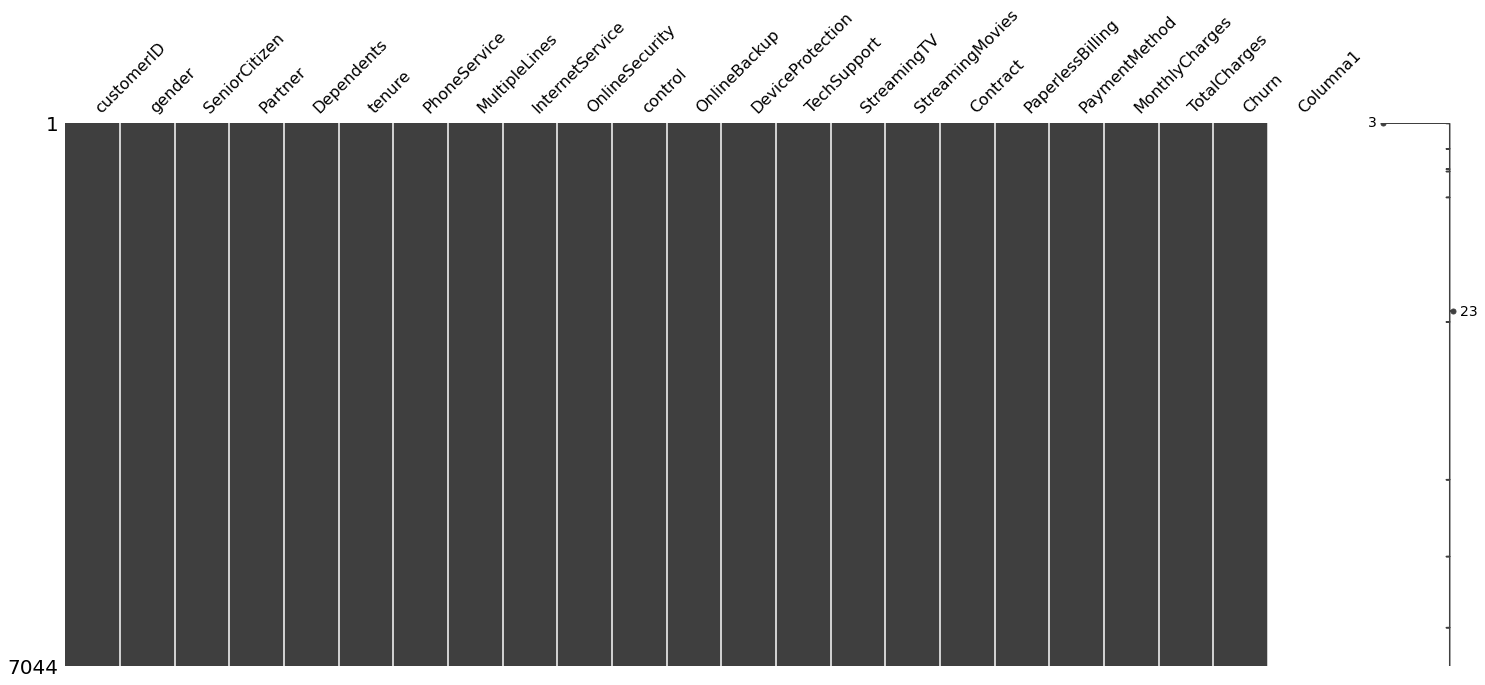

In [5]:
msno.matrix(dataframe);

In [6]:
dataframe.drop(['Columna1', 'customerID'], axis=1, inplace=True)

Aca vamos a buscar datos nulos dentro de nuestras columnas. Podemos observar que **TotalCharges** tiene 12 valores nulos

In [7]:
dataframe['TotalCharges'] = pd.to_numeric(dataframe.TotalCharges, errors='coerce')
dataframe.isnull().sum()

gender               1
SeniorCitizen        1
Partner              1
Dependents           1
tenure               1
PhoneService         1
MultipleLines        1
InternetService      1
OnlineSecurity       1
control              1
OnlineBackup         0
DeviceProtection     1
TechSupport          1
StreamingTV          1
StreamingMovies      1
Contract             2
PaperlessBilling     1
PaymentMethod        7
MonthlyCharges       0
TotalCharges        12
Churn                1
dtype: int64

Aca podemos ver que hay 12 filas con **tenure** igual a 0 lo cual no tiene sentido. Estas 12 columnas las vamos a eliminar porque no son utiles en nuestro analisis. Un cliente no puede tener 0 meses usando nuestros servicios.

In [8]:
dataframe[dataframe['tenure'] == 0].index

Int64Index([0, 1, 2, 3, 4, 6, 7, 8, 9, 10, 11], dtype='int64')

Eliminamos los 12 **tenure** invalidos

In [9]:
dataframe.drop(labels=dataframe[dataframe['tenure'] == 0].index, axis=0, inplace=True)

print(dataframe[dataframe['tenure'] == 0].index)

dataframe.isnull().sum()

Int64Index([], dtype='int64')


gender              1
SeniorCitizen       1
Partner             1
Dependents          1
tenure              1
PhoneService        1
MultipleLines       1
InternetService     1
OnlineSecurity      1
control             1
OnlineBackup        0
DeviceProtection    1
TechSupport         1
StreamingTV         1
StreamingMovies     1
Contract            2
PaperlessBilling    1
PaymentMethod       7
MonthlyCharges      0
TotalCharges        1
Churn               1
dtype: int64

Aca vamos a ver todos los datos que son nulos (NaN) para ver si hay algo que podamos eliminar. Crearemos una funcion **RenderizarColumnasConValoresNulos()** porque mas adelante la usaremos para verificar si eliminamos los datos deseados.

In [10]:
def RenderizarColumnasConValoresNulos():
    is_NaN = dataframe.isnull()
    row_has_NaN = is_NaN.any(axis=1)
    rows_with_NaN = dataframe[row_has_NaN]
    return rows_with_NaN

RenderizarColumnasConValoresNulos()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,control,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,NaN,NaN
338,Male,0.0,Yes,Yes,1.0,Yes,No,DSL,No,,...,No,No,No,No,Month-to-month,Yes,NaN,"45,85",45.85,Yes
601,Female,1.0,Yes,No,1.0,Yes,Yes,Fiber optic,No,NaN,...,No,No,No,No,Month-to-month,Yes,Electronic check,"74,45",74.45,Yes
632,Male,1.0,No,No,1.0,Yes,Yes,Fiber optic,No,,...,No,No,No,No,Month-to-month,Yes,NaN,"75,75",75.75,Yes
968,Female,0.0,No,No,2.0,Yes,Yes,Fiber optic,No,,...,No,No,No,No,Month-to-month,Yes,NaN,"75,90",143.35,Yes
2581,Female,0.0,Yes,No,16.0,No,No phone service,DSL,No,,...,No,Yes,Yes,Yes,Month-to-month,Yes,NaN,"49,95",810.20,Yes
4625,Male,0.0,No,No,38.0,Yes,No,Fiber_optic,No,,...,No,No,No,No,Month-to-month,Yes,NaN,"69,50",2625.25,No
5621,Male,0.0,Yes,Yes,64.0,Yes,No,DSL,Yes,,...,Yes,Yes,Yes,No,Two year,No,NaN,"69,25",4447.75,No
6542,Female,1.0,Yes,No,63.0,Yes,Yes,Fiber optic,No,,...,Yes,No,Yes,Yes,NaN,Yes,Electronic check,"103,50",6479.40,No


Podemos ver que la fila con el indice 5 es eliminable. Es totalmente nula. Pero tambien hay mas filas que tienen valores NaN y son pocas, asi que las vamos a eliminar.

In [11]:
dataframe.drop(RenderizarColumnasConValoresNulos().index, inplace=True)

Verificamos que ya no este la fila con el indice 5 que era totalmente nula y que acabamos de borrar ni tampoco cualquier otra con NaN

In [12]:
RenderizarColumnasConValoresNulos()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,control,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn


Convertir **MonthlyCharges** a float porque tiene espacios a los lados y un par de incoherencias mas.

In [13]:
# https://stackoverflow.com/questions/53840802/how-to-convert-a-string-in-float-with-a-space-pandas
dataframe['MonthlyCharges'] = [float(str(val).replace(' ','').replace(',','.')) for val in dataframe['MonthlyCharges'].values]

In [14]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7024 entries, 12 to 7043
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7024 non-null   object 
 1   SeniorCitizen     7024 non-null   float64
 2   Partner           7024 non-null   object 
 3   Dependents        7024 non-null   object 
 4   tenure            7024 non-null   float64
 5   PhoneService      7024 non-null   object 
 6   MultipleLines     7024 non-null   object 
 7   InternetService   7024 non-null   object 
 8   OnlineSecurity    7024 non-null   object 
 9   control           7024 non-null   object 
 10  OnlineBackup      7024 non-null   object 
 11  DeviceProtection  7024 non-null   object 
 12  TechSupport       7024 non-null   object 
 13  StreamingTV       7024 non-null   object 
 14  StreamingMovies   7024 non-null   object 
 15  Contract          7024 non-null   object 
 16  PaperlessBilling  7024 non-null   object 

La columna **SeniorCitizen** debe ser mapeada a Yes/No para crear homogeneidad.

In [15]:
dataframe["SeniorCitizen"] = dataframe["SeniorCitizen"].map({0: 'No', 1: 'Yes'})

In [16]:
dataframe.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,control,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
12,Male,No,Yes,Yes,1.0,Yes,No,No,No internet service,,...,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check,18.80,18.80,No
13,Male,No,No,No,1.0,Yes,No,No,No internet service,,...,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Mailed check,18.85,18.85,Yes
14,Female,No,No,No,1.0,Yes,No,No,No internet service,,...,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Electronic check,18.85,18.85,No
15,Male,No,No,No,1.0,Yes,No,No,No internet service,,...,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,18.90,18.90,No
16,Female,No,Yes,Yes,1.0,Yes,No,No,No internet service,,...,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Mailed check,19.00,19.00,No


En la siguiente linea veremos como la columna InternetService tiene cierta ambiguedad en sus valores. Tiene **DSL** y **DLS** ambas se refieren a Digital subscriber line. Asi que las unificaremos en **DSL**. Y **Fiber_optic** lo volveremos **Fiber optic**. Los **_** los volveremos NaN

Text(0.5, 1.0, '5 Categorias cuando bien podrian ser 3')

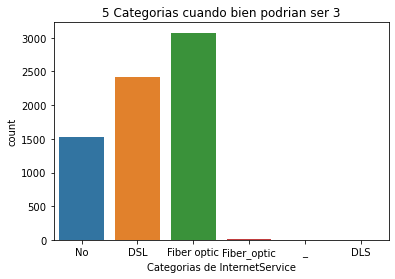

In [17]:
ax = sbn.countplot(x="InternetService", data=dataframe)

ax.set_xlabel('Categorias de InternetService')
ax.set_title('5 Categorias cuando bien podrian ser 3')

Text(0.5, 1.0, '3 Categorias, ahora esta columna esta mas limpia')

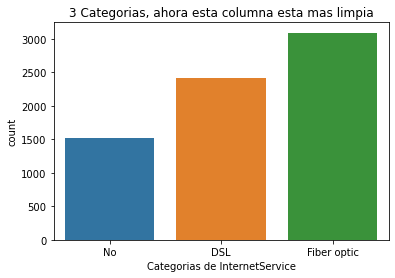

In [18]:
dataframe["InternetService"] = dataframe["InternetService"].map({"No": "No", "DSL":"DSL", "Fiber optic": "Fiber optic", 'DLS': 'DSL', "_": np.NaN, "Fiber_optic": "Fiber optic"})

ax = sbn.countplot(x="InternetService", data=dataframe)

ax.set_xlabel('Categorias de InternetService')
ax.set_title('3 Categorias, ahora esta columna esta mas limpia')

Ahora revisaremos si hay Outliers usando `boxplots`. Nos encontraremos con que hay un dato muy raro en **TotalCharges** de 843625.0

<AxesSubplot:xlabel='TotalCharges'>

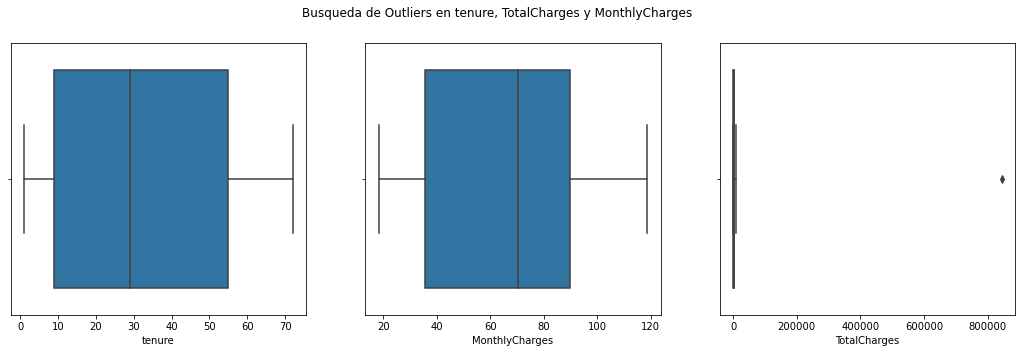

In [38]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

fig.suptitle('Busqueda de Outliers en tenure, TotalCharges y MonthlyCharges')

sbn.boxplot(ax=axes[0], x=dataframe["tenure"])
sbn.boxplot(ax=axes[1], x=dataframe["MonthlyCharges"])
sbn.boxplot(ax=axes[2], x=dataframe["TotalCharges"])

Con la siguiente funcion encontraremos el valor de este Outlier y procederemos luego a buscar el indice y usaremos `pandas.DataFrame.at` para editar el **TotalCharges**, lo dividiremos entre 100 para que quede dentro del rango de valores normales

In [68]:
# https://medium.datadriveninvestor.com/finding-outliers-in-dataset-using-python-efc3fce6ce32
def detect_outlier(data_1):
    outliers=[]
    threshold=3
    mean_1 = np.mean(data_1)
    std_1 =np.std(data_1)
    for y in data_1:
        z_score= (y - mean_1)/std_1 
        if np.abs(z_score) > threshold:
            outliers.append(y)
    return outliers

# Obtenga el valor numérico del valor atípico en TotalCharges
outliers = detect_outlier(dataframe["TotalCharges"])
if len(outliers):
    # Usa el valor para obtener la fila
    row_outlier = dataframe[dataframe["TotalCharges"] == outliers[0]]
    # Establecer una variable con el índice porque es solo el primer valor que nos da el array `row_outlier`
    index_outlier = row_outlier.index[0]
    # Usamos at para modificar el TotalCharges diviendolo por 100 asi borramos dos ceros
    dataframe.at[index_outlier, "TotalCharges"] =  row_outlier["TotalCharges"] / 100

<AxesSubplot:xlabel='TotalCharges'>

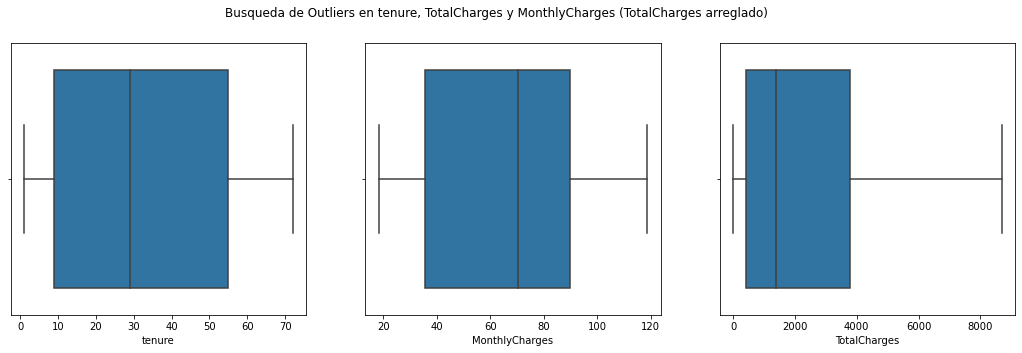

In [70]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

fig.suptitle('Busqueda de Outliers en tenure, TotalCharges y MonthlyCharges (TotalCharges arreglado)')

sbn.boxplot(ax=axes[0], x=dataframe["tenure"])
sbn.boxplot(ax=axes[1], x=dataframe["MonthlyCharges"])
sbn.boxplot(ax=axes[2], x=dataframe["TotalCharges"])

## 4.) Estadistica Descriptiva y Distribucion de datos

Los unicos valores numericos son **tenure**, **TotalCharges** y **MonthlyCharges**

In [20]:
numerical_cols = ["tenure", "TotalCharges", "MonthlyCharges"]

In [21]:
dataframe[numerical_cols].describe()

,tenure,TotalCharges,MonthlyCharges
count,7024.000000,7024.000000,7024.000000
mean,32.432232,2402.707268,64.791693
std,24.541484,10291.225458,30.097296
min,1.000000,0.000000,18.250000
25%,9.000000,401.925000,35.537500
50%,29.000000,1397.950000,70.350000
75%,55.000000,3794.737500,89.900000
max,72.000000,843625.000000,118.750000


Veamos en porcentaje como se comporta el **Churn**

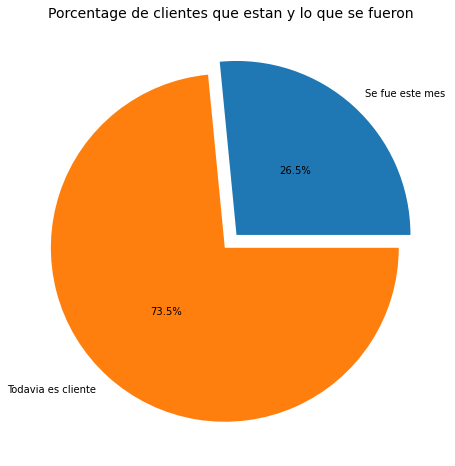

In [22]:
churn_values_counted = dataframe['Churn'].value_counts(normalize=True) * 100
pie, ax = plt.subplots(figsize=[8,8])
plt.pie(x=[churn_values_counted["Yes"], churn_values_counted["No"]], 
        autopct="%.1f%%",
        explode=[0.05]*2,
        labels=["Se fue este mes", "Todavia es cliente"],
        pctdistance=0.5)
plt.title("Porcentage de clientes que estan y lo que se fueron", fontsize=14);
plt.show()

En las siguientes distribuciones podemos ver que una gran parte de los clientes tienen un **tenure** de ~70 Meses. Pero la gran mayoria tiene un **tenure** que no supera los ~ 10 meses.

<AxesSubplot:xlabel='TotalCharges', ylabel='Count'>

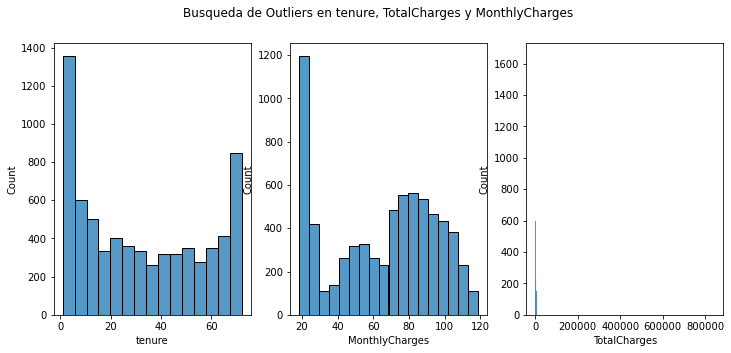

In [23]:
fig, axes = plt.subplots(1, 3, figsize=(12, 5))

fig.suptitle('Busqueda de Outliers en tenure, TotalCharges y MonthlyCharges')

sbn.histplot(dataframe["tenure"], ax=axes[0])
sbn.histplot(dataframe["MonthlyCharges"], ax=axes[1])
sbn.histplot(dataframe["TotalCharges"], ax=axes[2])

En estos siguientes dos graficos se nota como los clientes nuevos son los que abandonan Telco mas temprano. Y ademas los clientes con mas monto de facturacion mensual son los que tambien se van.

Relacion entre el **MonthlyCharges** del cliente y el **Churn**

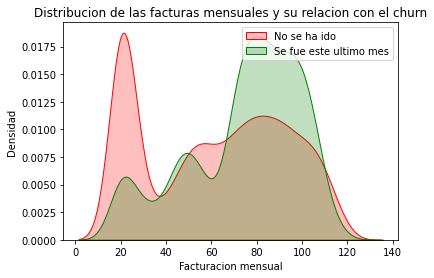

In [24]:
ax = sbn.kdeplot(dataframe.MonthlyCharges[(dataframe["Churn"] == 'No') ], color="Red", shade = True);
ax = sbn.kdeplot(dataframe.MonthlyCharges[(dataframe["Churn"] == 'Yes') ],ax =ax, color="Green", shade= True);
ax.legend(["No se ha ido","Se fue este ultimo mes"],loc='upper right');
ax.set_ylabel('Densidad');
ax.set_xlabel('Facturacion mensual');
ax.set_title('Distribucion de las facturas mensuales y su relacion con el churn');

Relacion entre el **Tenure** del cliente y el **Churn**

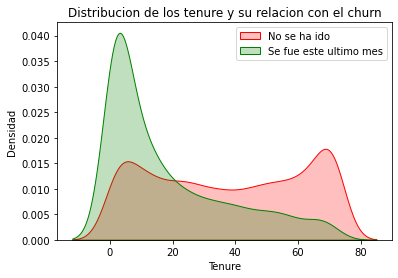

In [25]:
ax = sbn.kdeplot(dataframe.tenure[(dataframe["Churn"] == 'No') ], color="Red", shade = True);
ax = sbn.kdeplot(dataframe.tenure[(dataframe["Churn"] == 'Yes') ],ax =ax, color="Green", shade= True);
ax.legend(["No se ha ido","Se fue este ultimo mes"],loc='upper right');
ax.set_ylabel('Densidad');
ax.set_xlabel('Tenure');
ax.set_title('Distribucion de los tenure y su relacion con el churn');

Aca podemos ver que hay mas clientes con Internet Service que con Telefono, pero la diferencia no es muy grande

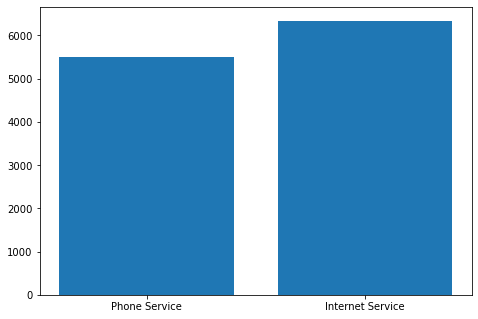

In [26]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(['Phone Service', 'Internet Service'], [
    dataframe[(dataframe["InternetService"] == "DSL") | (dataframe["InternetService"] == "Fiber optic")].shape[0],
    dataframe[dataframe["PhoneService"] == "Yes"].shape[0]
])
plt.show()

## 5.) Conclusion:

Para los clientes mas antiguos deberiamos hacerles ofertas para que pagen un poco menos y asi no abandonen nuestros servicios.

Para los nuevos clientes deberiamos crear una estrategia que haga que ellos se queden con nosotros porque los datos demuestran que muchos se van antes de los 5 meses. Quizas nuestros precios estan muy altos. 